<a href="https://colab.research.google.com/github/jingliu8876133/hello-world/blob/master/2AvocadoModelDefinitionDeployment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AvocadoPriceAnalysisAndPrediction_Part2
## [Model defintion and deployment]
#### Avocado Prices and Sales Volume in multiple US markets (2015-2020)


## Content

    
    
1. [[Model defintion and deployment] Stateful LSTM Univariant](#[Model-defintion-and-deployment]-Stateful-LSTM-Univariant)
2. [[Reference1] Other Machine Learning Methods without Neural networks](#[Reference1]-Other-Machine-Learning-Methods-without-Neural-networks)
4. [[Reference2] Classical Time Series Predictions](#[Reference2]-Classical-Time-Series-Predictions)
5. [[Reference3] fbprophet](#[Reference3]-fbprophet)
    

##### Input data：AfterCleansingFeatureCreation_AvocadoPriceUSA20152019.csv#####
    After the Part 1 of data cleansing and some general feature creation, I created a dataset called AfterCleansingFeatureCreation_AvocadoPriceUSA20152019.csv b
    The original data I used in this project is from Kaggle page (https://www.kaggle.com/alanluo418/avocado-prices-20152019). All the data was obtained from the Hass Avocado Board website in January of 2020.
    The above page refers to an earlier Kaggle page about Avocado price (https://www.kaggle.com/neuromusic/avocado-prices).

##### Columns in the input dataset AvocadoPriceTotalUS20152019.csv#####
    Date - The date of the observation
    AveragePrice - The Average Sales Price of Current Year
    Total Volume - Total Bulk and Bags Units
    4046 - Total number of avocados with PLU 4046 sold
    4225 - Total number of avocados with PLU 4225 sold
    4770 - Total number of avocados with PLU 4770 sold
    Total Bags - 
    Small Bags - 
    Large Bags - 
    XLarge Bags - 
    type - conventional or organic
    year - the current year
    region - original region name with not consistent name
    Month - the current month
    Region - region names after unification
    name - region name in the orginal geo_dataframe
    pop - population of the region
    lat - latitude of the region
    lon - longitude of the region
    
    -------------------------------------------------------

    TotalVolume = 4046 + 4225 + 4770 + TotalBags
    TotalBags = SmallBags + LargeBags + XLargeBags

##### Output dataset and model #####
    Here we want to use the deep learning algorithum Long-shortTermMemory (LSTM) to predict the price of avocado in the future. In order to better evaluate the performance of this algorithum, we compare the performance of LSTM-method to the other machine learning algorithum (e.g. DecisionTree, RandomFrorest, KNearestNeighbors, SVR, AdaBoost, GradientBoost, XGBoost and CatBoost), classical ARIMA and dfprophet API, which is an additive regression model with four main components
    
    Model Definition:
    1. Identify the relevant data columns
    2. Prepare relevant data for the each algorithum
    
    Model Deployement:
    1.
    



In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style('white')
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from numpy import concatenate
from matplotlib import pyplot
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
import sklearn
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras.callbacks import Callback
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Activation
import pickle
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import sys
from queue import Queue
import pandas as pd
import json
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [7]:
fluff, id = 'https://drive.google.com/open?id=1mptriAnoGXZfZvK1ehsMJa-AYVG_o3Fo'.split('=')
print (id) # Verify that you have everything after '='



1mptriAnoGXZfZvK1ehsMJa-AYVG_o3Fo


In [8]:
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('AfterCleansingFeatureCreation_AvocadoPriceUSA20152019.csv')  
df = pd.read_csv('AfterCleansingFeatureCreation_AvocadoPriceUSA20152019.csv',index_col=0)
df.head()
# Dataset is now stored in a Pandas Dataframe

Date  AveragePrice  Total Volume  ...      pop        lat        lon
0  2015-01-04          1.22      40873.28  ...  98012.0  42.651167 -73.754968
1  2015-01-04          1.22      40873.28  ...  77746.0  42.651167 -73.754968
2  2015-01-04          1.22      40873.28  ...  51053.0  42.651167 -73.754968
3  2015-01-04          1.22      40873.28  ...  18767.0  42.651167 -73.754968
4  2015-01-11          1.24      41195.08  ...  98012.0  42.651167 -73.754968

[5 rows x 19 columns]

In [0]:
# import pandas as pd
# df= pd.read_csv('AfterCleansingFeatureCreation_AvocadoPriceUSA20152019.csv', 
#     index_col=0,
# )

# df.head()

In [0]:
#Another way of importing data from google drive

# from google.colab import drive
# drive.mount('/content/drive')

In [0]:

# path = "https://drive.google.com/open?id=1RsGLH2v8-qOBMLOK27ge-E4pKssT6fFo"
# df_bonus = pd.read_csv(path)
# # Dataset is now stored in a Pandas Dataframe


In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32384 entries, 0 to 32383
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          32384 non-null  object 
 1   AveragePrice  32384 non-null  float64
 2   Total Volume  32384 non-null  float64
 3   4046          32384 non-null  float64
 4   4225          32384 non-null  float64
 5   4770          32384 non-null  float64
 6   Total Bags    32384 non-null  float64
 7   Small Bags    32384 non-null  float64
 8   Large Bags    32384 non-null  float64
 9   XLarge Bags   32384 non-null  float64
 10  type          32384 non-null  object 
 11  year          32384 non-null  int64  
 12  region        32384 non-null  object 
 13  Month         32384 non-null  int64  
 14  Region        32384 non-null  object 
 15  name          25806 non-null  object 
 16  pop           25806 non-null  float64
 17  lat           25806 non-null  float64
 18  lon           25806 non-nu

In [9]:
conventional = df[df.type =='conventional']
conventional_groupByDate = conventional.groupby('Date').mean()
organic = df[df.type =='organic'].groupby('Date').mean()
organic_groupByDate = organic.groupby('Date').mean()
organic_groupByDate.head()


AveragePrice  Total Volume  ...        lat        lon
Date                                    ...                      
2015-01-04      1.606094   8157.813437  ...  38.546966 -90.940838
2015-01-11      1.662031   9322.885781  ...  38.546966 -90.940838
2015-01-18      1.694531   9902.903594  ...  38.546966 -90.940838
2015-01-25      1.712031   7305.642812  ...  38.546966 -90.940838
2015-02-01      1.578750   9862.181719  ...  38.546966 -90.940838

[5 rows x 14 columns]

In [0]:
#Plot the time series of organic and conventional avocado price
import plotly
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
init_notebook_mode(connected=True)



fig = go.Figure()



scatter1=go.Scatter(x=conventional_groupByDate.index,y=conventional_groupByDate.AveragePrice,
                   name='conventional',mode='lines+markers',marker=dict(
                                 color='rgb(158,202,225)',
                                 line=dict(
                                 color='rgb(8,48,107)',
                                 width=1.5)),
                                opacity=0.8)
scatter2=go.Scatter(x=
organic_groupByDate.index,y=organic_groupByDate.AveragePrice,
                   name='organic',mode='lines+markers',marker=dict(
                                 color='rgb(248,146,146)',
                                 line=dict(
                                 color='rgb(249,52,52)',
                                 width=1.5)),
                                opacity=0.8)

data=[scatter1,scatter2]

layout = go.Layout(title='Time Series Plot for Mean Daily Price',
                  xaxis={'title':'Date'},yaxis={'title':'Prices'})
figure=go.Figure(data=data,layout=layout)


#iplot(figure)



figure.show(renderer="colab")


In [0]:
#Plot the time series of organic and conventional avocado Total Volumn
import plotly
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
init_notebook_mode(connected=True)

fig = go.Figure()

scatter1=go.Scatter(x=conventional_groupByDate.index,y=conventional_groupByDate['Total Volume'],
                   name='conventional',mode='lines+markers',marker=dict(
                                 color='rgb(158,202,225)',
                                 line=dict(
                                 color='rgb(8,48,107)',
                                 width=1.5)),
                                opacity=0.8)
scatter2=go.Scatter(x=organic_groupByDate.index,y=organic_groupByDate['Total Volume'],
                   name='organic',mode='lines+markers',marker=dict(
                                 color='rgb(248,146,146)',
                                 line=dict(
                                 color='rgb(249,52,52)',
                                 width=1.5)),
                                opacity=0.8)

data=[scatter1,scatter2]

layout = go.Layout(title='Time Series Plot for Mean Daily Volume',
                  xaxis={'title':'Date'},yaxis={'title':'Volume'})
figure=go.Figure(data=data,layout=layout)
#iplot(figure)

figure.show(renderer="colab")


    The conventional avocado volume is more than 10 times higher than that of organic one. We want to focus on predicting the price of the conventional avocado. 

### [Model defintion and deployment] Stateful LSTM Univariant

    With stateful LSTM, we can have fine-grained control over when the internal state of the LSTM newwork is reset.

In [10]:
conventional_groupByDate.head()
#The data were taken on every sunday.

AveragePrice   Total Volume  ...        lat        lon
Date                                     ...                      
2015-01-04      1.021719  372397.583437  ...  38.546966 -90.940838
2015-01-11      1.133906  333583.128906  ...  38.546966 -90.940838
2015-01-18      1.161406  323254.015156  ...  38.546966 -90.940838
2015-01-25      1.137500  319078.954687  ...  38.546966 -90.940838
2015-02-01      0.972656  515223.592344  ...  38.546966 -90.940838

[5 rows x 14 columns]

In [0]:
#Make sure the index is in the date format.
conventional_groupByDate.index = pd.to_datetime(conventional_groupByDate.index)

In [0]:
conventional_groupByDate['Day_of_month'] = conventional_groupByDate.index.day


In [0]:
conventional_groupByDate['Day_of_week'] = conventional_groupByDate.index.dayofweek


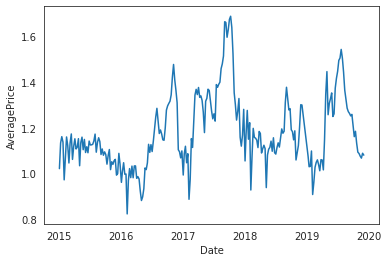

In [0]:
#Let's have a quick look at the time series of the averageprice we want to predict. It is a weekly frequency data.
sns.lineplot(x=conventional_groupByDate.index,y='AveragePrice',data=conventional_groupByDate)


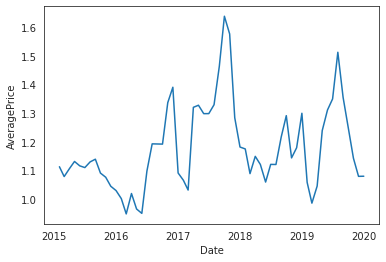

In [0]:
#If we look at a higher aggregation level of Month instead of Week. The time series looks like this.
#It appears that it has some seasonality with some trend across the year on top of it.
conventional_ByMonth = conventional_groupByDate.resample('M').mean()
sns.lineplot(x=conventional_ByMonth.index,y='AveragePrice',data=conventional_ByMonth)


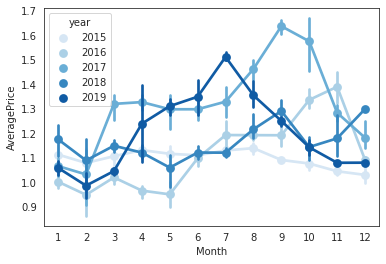

In [0]:
#To better view the seasonablity we can plot the monthly time series for each year.
sns.pointplot(data = conventional_groupByDate, x= 'Month', y='AveragePrice', hue='year', palette = 'Blues')

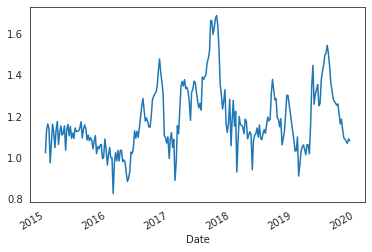

In [33]:
conventional_AveragePrice = conventional_groupByDate['AveragePrice']
conventional_AveragePrice.plot()

Preprocessing

In [34]:
conventional_AveragePrice = conventional_AveragePrice.to_frame()
#conventional_AveragePrice.to_frame().values
conventional_AveragePrice.head()

AveragePrice
Date                    
2015-01-04      1.021719
2015-01-11      1.133906
2015-01-18      1.161406
2015-01-25      1.137500
2015-02-01      0.972656

In [0]:
#Stateless Bidirectional LSTM based on https://github.com/curiousily/Deep-Learning-For-Hackers/blob/master/12.time-series-demand_prediction.ipynb

In [35]:
df = conventional_AveragePrice.copy()

#Stateful
train_size = 200#int(len(df) * 0.8)
# #Stateless
# train_size = int(len(df) * 0.8)
test_size = len(df) - train_size
train, test = df.iloc[0:train_size], df.iloc[train_size:len(df)]
print(len(train), len(test))

200 53


In [58]:
test

AveragePrice
Date                    
2018-11-04      0.309946
2018-11-11      0.346293
2018-11-18      0.439421
2018-11-25      0.552441
2018-12-02      0.550814
2019-01-07      0.292767
2019-01-13      0.238879
2019-01-20      0.240145
2019-01-27      0.318264
2019-02-03      0.098192
2019-02-10      0.160398
2019-02-17      0.235805
2019-02-24      0.260940
2019-03-03      0.273418
2019-03-10      0.249548
2019-03-17      0.218264
2019-03-24      0.274503
2019-03-31      0.272694
2019-04-07      0.222785
2019-04-14      0.377034
2019-04-21      0.605063
2019-04-28      0.719892
2019-05-05      0.501808
2019-05-12      0.559132
2019-05-19      0.583363
2019-05-26      0.612116
2019-06-02      0.492767
2019-06-09      0.506148
2019-06-16      0.636528
2019-06-23      0.685895
2019-06-30      0.721157
2019-07-07      0.776673
2019-07-14      0.788608
2019-07-21      0.832188
2019-07-28      0.788427
2019-08-04      0.717360
2019-08-11      0.625497
2019-08-18      0.581917
2019-08-25      0.535081
2019-09-01      0.517360
2019-09-08      0.508318
2019-09-15      0.495841
2019-09-22      0.503436
2019-09-29      0.447378
2019-10-06      0.390778
2019-10-13      0.417902
2019-10-20      0.357685
2019-10-27      0.312658
2019-11-03      0.305606
2019-11-10      0.292224
2019-11-17      0.282278
2019-11-24      0.306872
2019-12-01      0.297288

In [36]:
#Scale the data
from sklearn.preprocessing import MinMaxScaler
AveragePrice_transformer= MinMaxScaler()
AveragePrice_transformer = AveragePrice_transformer.fit(train[['AveragePrice']])
train['AveragePrice'] = AveragePrice_transformer.transform(train[['AveragePrice']])
test['AveragePrice'] = AveragePrice_transformer.transform(test[['AveragePrice']])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [37]:
train.head()

AveragePrice
Date                    
2015-01-04      0.229114
2015-01-11      0.358951
2015-01-18      0.390778
2015-01-25      0.363110
2015-02-01      0.172333

In [0]:
def create_dataset(X, y, time_steps=1):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        v = X.iloc[i:(i + time_steps)].values
        Xs.append(v)        
        ys.append(y.iloc[i + time_steps])
    return np.array(Xs), np.array(ys)

In [39]:
# time_steps = 50
time_steps = 10
#time_steps = 20

# reshape to [samples, time_steps, n_features]

X_train, y_train = create_dataset(train, train.AveragePrice, time_steps)
X_test, y_test = create_dataset(test, test.AveragePrice, time_steps)

print(X_train.shape, y_train.shape)

(190, 10, 1) (190,)


Model definition

In [0]:
model = Sequential()

# #SingleBidirectionalLSTMLayer
# model.add(Bidirectional(LSTM(units=128, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2]))))
# model.add(Dropout(rate=0.2))
# model.add(Dense(units=1))


 
# #StackedLSTMlayers
# model.add(LSTM(units=128, activation='relu', return_sequences = True, input_shape=(X_train.shape[1], X_train.shape[2])))
# model.add(Dropout(rate=0.2))

# model.add(LSTM(units=128, activation='relu', return_sequences = True))
# model.add(Dropout(rate=0.2))

# model.add(LSTM(units=128, activation='relu', return_sequences = True))
# model.add(Dropout(rate=0.2))

# model.add(LSTM(units=128, activation='relu'))
# model.add(Dropout(rate=0.2))
# model.add(Dense(units=1))
# model.compile(loss='mse', optimizer='adam')




#Stateful LSTM network
batch_size = 10
epoch_number = 30
model = Sequential()
model.add(LSTM(128,batch_input_shape=(batch_size,X_train.shape[1],X_train.shape[2]),stateful=True))
model.add(Dropout(0.2))
model.add((Dense(1)))
model.compile(loss='mse', optimizer='adam')




# #SingleLSTMLayer
# model.add(LSTM(units=128, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
# model.add(Dropout(rate=0.2))
# model.add(Dense(units=1))
# model.compile(loss='mse', optimizer='adam')













Model deployment

In [106]:

# #Stateful LSTM fit
# for i in range(epoch_number):
#   model.fit(X_train,y_train, epochs=5, batch_size=batch_size, verbose=0,  shuffle=False)
#   # model.reset_states()

history = model.fit(
    X_train, y_train, 
    epochs=50, 
    batch_size=10, 
    #validation_split=0.1,
    shuffle=True
)


Epoch 1/50
19/19 [==============================] - 0s 7ms/step - loss: 0.0457
Epoch 2/50
19/19 [==============================] - 0s 7ms/step - loss: 0.0160
Epoch 3/50
19/19 [==============================] - 0s 7ms/step - loss: 0.0172
Epoch 4/50
19/19 [==============================] - 0s 7ms/step - loss: 0.0140
Epoch 5/50
19/19 [==============================] - 0s 7ms/step - loss: 0.0135
Epoch 6/50
19/19 [==============================] - 0s 7ms/step - loss: 0.0127
Epoch 7/50
19/19 [==============================] - 0s 7ms/step - loss: 0.0122
Epoch 8/50
19/19 [==============================] - 0s 6ms/step - loss: 0.0121
Epoch 9/50
19/19 [==============================] - 0s 8ms/step - loss: 0.0123
Epoch 10/50
19/19 [==============================] - 0s 8ms/step - loss: 0.0113
Epoch 11/50
19/19 [==============================] - 0s 7ms/step - loss: 0.0112
Epoch 12/50
19/19 [==============================] - 0s 8ms/step - loss: 0.0108
Epoch 13/50
19/19 [==============================

In [46]:
#Stateless fit
history = model.fit(
    X_train, y_train, 
    epochs=50, 
    batch_size=30, 
    validation_split=0.1,
    shuffle=False
)

Epoch 1/50
6/6 [==============================] - 0s 38ms/step - loss: 0.1498 - val_loss: 0.0966
Epoch 2/50
6/6 [==============================] - 0s 13ms/step - loss: 0.0717 - val_loss: 0.0341
Epoch 3/50
6/6 [==============================] - 0s 14ms/step - loss: 0.0224 - val_loss: 0.0113
Epoch 4/50
6/6 [==============================] - 0s 15ms/step - loss: 0.0257 - val_loss: 0.0115
Epoch 5/50
6/6 [==============================] - 0s 13ms/step - loss: 0.0208 - val_loss: 0.0113
Epoch 6/50
6/6 [==============================] - 0s 14ms/step - loss: 0.0195 - val_loss: 0.0125
Epoch 7/50
6/6 [==============================] - 0s 15ms/step - loss: 0.0191 - val_loss: 0.0102
Epoch 8/50
6/6 [==============================] - 0s 13ms/step - loss: 0.0177 - val_loss: 0.0094
Epoch 9/50
6/6 [==============================] - 0s 13ms/step - loss: 0.0186 - val_loss: 0.0095
Epoch 10/50
6/6 [==============================] - 0s 14ms/step - loss: 0.0169 - val_loss: 0.0099
Epoch 11/50
6/6 [============

Model evaluation

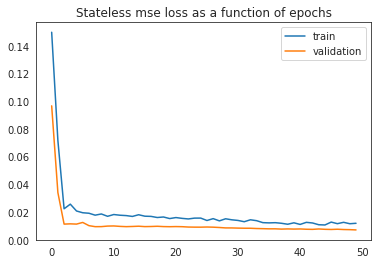

In [47]:
#Stateless loss with epoch
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.title('Stateless mse loss as a function of epochs')
plt.legend();

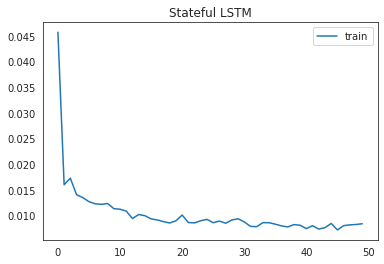

In [107]:
#Stateful loss with epoch
plt.plot(history.history['loss'], label='train')
#plt.plot(history.history['val_loss'], label='validation')
plt.title('Stateful LSTM')
plt.legend();

In [0]:
# X_test[:30]

#If you use the real test data to predict 

In [0]:
#Stateless LSTM predicition
y_pred = model.predict(X_test)

In [0]:
#Stateful LSTM predicition
#The prediction has the length of the batch size (30)
y_pred = model.predict(X_test[:10])


In [0]:
y_train_inv = AveragePrice_transformer.inverse_transform(y_train.reshape(1, -1))
y_test_inv = AveragePrice_transformer.inverse_transform(y_test.reshape(1, -1))
y_pred_inv = AveragePrice_transformer.inverse_transform(y_pred)

In [74]:
#stateless
train_series = pd.Series(y_train_inv.flatten(), index=conventional_AveragePrice[time_steps:train_size].index)
test_series = pd.Series(y_test_inv.flatten(), index=conventional_AveragePrice[-test_size:-time_steps].index)
prediction_series = pd.Series(y_pred_inv.flatten(), index=test.index[-test_size:-time_steps])
stateless_results_df = pd.concat([train_series, test_series, prediction_series], axis=1)
stateless_results_df.columns = ['train', 'test', 'prediction']
stateless_results_df.head()

train  test  prediction
Date                                  
2015-03-15  1.173281   NaN         NaN
2015-03-22  1.062031   NaN         NaN
2015-03-29  1.118281   NaN         NaN
2015-04-05  1.152187   NaN         NaN
2015-04-12  1.107656   NaN         NaN

In [118]:
#stateful
train_series = pd.Series(y_train_inv.flatten(), index=conventional_AveragePrice[time_steps:train_size].index)
test_series = pd.Series(y_test_inv.flatten(), index=conventional_AveragePrice[-test_size:-time_steps].index)
prediction_series = pd.Series(y_pred_inv.flatten(), index=test.index[-test_size:(-test_size + time_steps)])
stateful_results_df = pd.concat([train_series, test_series, prediction_series], axis=1)
stateful_results_df.columns = ['train', 'test', 'prediction']
stateful_results_df.head()

train  test  prediction
Date                                  
2015-03-15  1.173281   NaN         NaN
2015-03-22  1.062031   NaN         NaN
2015-03-29  1.118281   NaN         NaN
2015-04-05  1.152187   NaN         NaN
2015-04-12  1.107656   NaN         NaN

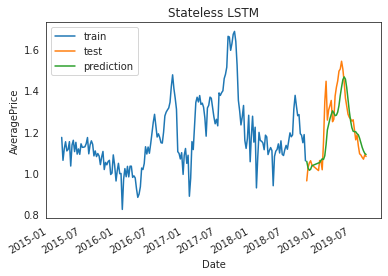

In [76]:
stateless_results_df.plot()
plt.ylabel('AveragePrice')
plt.title('Stateless LSTM')
plt.show()

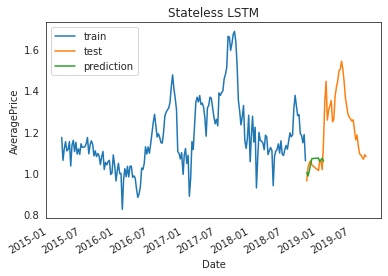

In [119]:
stateful_results_df.plot()
plt.ylabel('AveragePrice')
plt.title('Stateless LSTM')
plt.show()

#If you use the predicted values as input to predict 


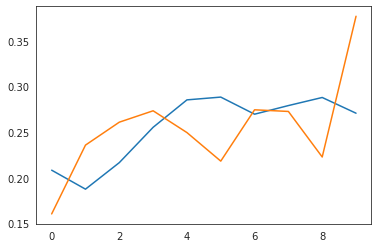

In [131]:
plt.plot(model.predict(X_test[:10]))
plt.plot(y_test[:10])

In [126]:
#If you use the predicted values as input to predict 
n_input = X_train.shape[1]
n_features = X_train.shape[2]
pred_list = []

batch = train[-n_input:].values.reshape((n_input, 1, n_features))

for i in range(2 * test_size):
    pred_list.append(model.predict(batch)[0])
    batch = np.append(batch[:,1:,:],[[pred_list[i]]],axis=1)
       
#Here we will use the data we predicted for january in order to predict the feb data.



ValueError: ignored

In [0]:
from pandas.tseries.offsets import Week
extra_indices = [test.index[-1] + Week(n + 1) for n in range(test_size)]
extended_index = test.index.append(pd.DatetimeIndex(extra_indices))

In [0]:
df_predict = pd.DataFrame(AveragePrice_transformer.inverse_transform(pred_list),
                          index=extended_index,
                         columns = ['Prediction'])

df_test = pd.concat([conventional_AveragePrice, df_predict], axis=1)

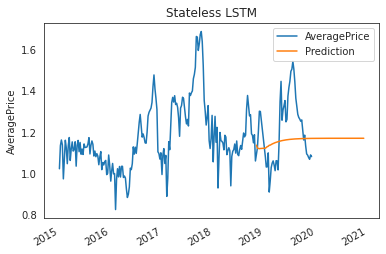

In [103]:
#Stateless
df_test.plot()
plt.ylabel('AveragePrice')
plt.title('Stateless LSTM')
plt.show()



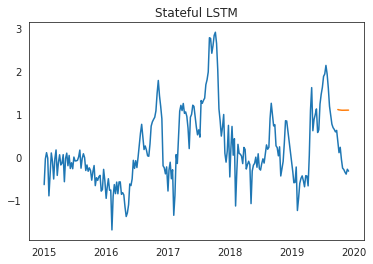

In [602]:

#Stateful is doing worse than the stateless.
plt.plot(df_test.index,df_test['AveragePrice'])
plt.plot(df_test.index,df_test['Prediction'])
plt.title('Stateful LSTM')
plt.show()


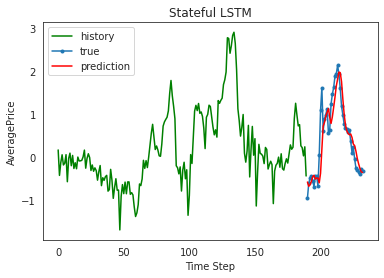

In [597]:

#Plot the stateful LSTM results
plt.plot(np.arange(0, len(y_train)), y_train_inv.flatten(), 'g', label="history")
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_test_inv.flatten(), marker='.', label="true")
plt.plot(np.arange(len(y_train), len(y_train) + 43), y_pred_inv.flatten(), 'r', label="prediction")
#The prediction has the length of the batch size (30), which has to be divisible by the length of the training dataset.
plt.ylabel('AveragePrice')
plt.xlabel('Time Step')
plt.title('Stateful LSTM')
plt.legend()
plt.show();

#When you take smaller time_steps as history to look back, it seems like the prediciton results of stateful and stateless is more similar.

In [0]:
# trainScore = model.evaluate(X_train, y_train, batch_size=batch_size, verbose=0)
# print('TrainScore_batchSize={batchSize}_epochs={epochs}:'.format(batchSize=batch_size,epochs=epoch_number), trainScore)
# testScore = model.evaluate(X_test ,y_test, batch_size=batch_size, verbose=0)
# print('TestScore_batchSize={batchSize}_epochs={epochs}:'.format(batchSize=batch_size,epochs=epoch_number), testScore)


(180, 20, 1)

In [0]:
pred_list = []

batch = train[-n_input:].reshape((1, n_input,n_features))

for i in range(n_input):
    pred_list.append(model.predict(batch)[0])
    batch = np.append(batch[:,1:,:],[[pred_list[i]]],axis=1)
    
#Here we will use the data we predicted for january in order to predict the feb data.


In [0]:
df_predict = pd.DataFrame(scaler.inverse_transform(pred_list),
                          index=conventional_AveragePrice[-n_input:].index,
                         columns = ['Prediction'])

df_test = pd.concat([conventional_AveragePrice, df_predict], axis=1)

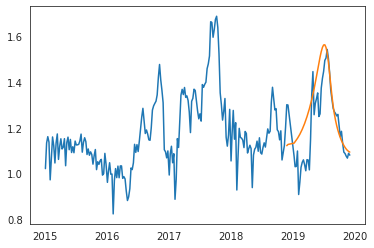

In [0]:
plt.plot(df_test.index,df_test['AveragePrice'])
plt.plot(df_test.index,df_test['Prediction'])
plt.show()

In [0]:
train = conventional_AveragePrice
scaler.fit(train)
train= scaler.transform(train)

#### [Reference1] Other Machine Learning Methods without Neural networks

In [0]:
#Prepare the data for the sklearn models
conventional.columns
conventional.head()

Date  AveragePrice  Total Volume  ...      pop        lat        lon
0  2015-01-04          1.22      40873.28  ...  98012.0  42.651167 -73.754968
1  2015-01-04          1.22      40873.28  ...  77746.0  42.651167 -73.754968
2  2015-01-04          1.22      40873.28  ...  51053.0  42.651167 -73.754968
3  2015-01-04          1.22      40873.28  ...  18767.0  42.651167 -73.754968
4  2015-01-11          1.24      41195.08  ...  98012.0  42.651167 -73.754968

[5 rows x 19 columns]

1. Remove collinear features
    Before building a machine learning model, let's remove the coloumns that are highly collinear with one another. We do not want to use multiple collinear (e.g.: TotalVolume = 4046 + 4225 + 4770 + TotalBags, TotalBags = SmallBags + LargeBags + XLargeBags). So I am going to 

In [0]:
ml_df = conventional.copy()
X = ml_df.drop('AveragePrice',1)
y = ml_df.AveragePrice


In [0]:
ml_df = pd.concat([X,y],1)

In [0]:
ml_df = ml_df.groupby('Date').mean()

In [0]:
ml_df.dtypes

Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
year              int64
Month             int64
pop             float64
lat             float64
lon             float64
AveragePrice    float64
dtype: object

In [0]:
ml_df.head()

Total Volume           4046  ...        lon  AveragePrice
Date                                      ...                         
2015-01-04  372397.583437  135844.061562  ... -90.940838      1.021719
2015-01-11  333583.128906  122830.545156  ... -90.940838      1.133906
2015-01-18  323254.015156  124008.136094  ... -90.940838      1.161406
2015-01-25  319078.954687  123813.233906  ... -90.940838      1.137500
2015-02-01  515223.592344  202577.815156  ... -90.940838      0.972656

[5 rows x 14 columns]

In [0]:
ml_df.columns

Index(['Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags',
       'Large Bags', 'XLarge Bags', 'year', 'Month', 'pop', 'lat', 'lon',
       'AveragePrice'],
      dtype='object')

In [0]:
X = ml_df[['Total Volume','Total Bags','year','Month']]
y = ml_df.AveragePrice

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.1,shuffle=False)

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from xgboost import XGBRFRegressor
from sklearn.linear_model import Lasso,Ridge,BayesianRidge,ElasticNet,HuberRegressor,LinearRegression,LogisticRegression,SGDRegressor
from sklearn.metrics import mean_squared_error
import numpy as np
import warnings
warnings.filterwarnings('ignore')

#print X_train.shape, X_test.shape

ml_models = [['DecisionTree:', DecisionTreeRegressor()],
            ['RandomForest:', RandomForestRegressor()],
            ['KNeighborsRegressor:', KNeighborsRegressor()],
            ['SVM:',SVR()],
            ['AdaBoostRegressor:',AdaBoostRegressor()],
            ['GradientBoostingRegressor:',GradientBoostingRegressor()],
            ['XGBoost', XGBRegressor()],
            ['Lasso:',Lasso()],
            ['Ridge:',Ridge()],
            ['BayesianRidge:',BayesianRidge()],
            ['ElasticNet:',ElasticNet()],
            ['HuberRegressor:',HuberRegressor()]]

print('Accuracy Results...')

for model_name, model in ml_models:
    model = model
    model.fit(X_train,y_train)
    predictions = model.predict(X_test)
    print(model_name, (np.sqrt(mean_squared_error(y_test,predictions))))


Accuracy Results...
DecisionTree: 0.14967191684583891
RandomForest: 0.11194277303006646
KNeighborsRegressor: 0.15376319908947889
SVM: 0.16385390728282861
AdaBoostRegressor: 0.1529867366939284
GradientBoostingRegressor: 0.10932196776937733
[09:25:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
XGBoost 0.11691475825774944
Lasso: 0.1682761997337237
Ridge: 0.16824412014859905
BayesianRidge: 0.1727463283257499
ElasticNet: 0.16826647619952456
HuberRegressor: 0.16803518858384986


In [0]:
import plotly
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
init_notebook_mode(connected=True)

model = Lasso()
model.fit(X_train,y_train)
predictions = model.predict(X_test)

newdf = y_test.copy()
newdf['Predictions']=predictions

scatter1 = go.Scatter(x=ml_df.index, y=ml_df.AveragePrice, name='Actual',mode='lines+markers',marker=dict(
                                 color='rgb(158,202,225)',
                                 line=dict(
                                 color='rgb(8,48,107)',
                                 width=1.5)),
                                opacity=0.8)
scatter2 = go.Scatter(x=newdf.index, y=newdf.Predictions, name='Predictions',mode='lines+markers',marker=dict(
                                 color='rgb(248,146,146)',
                                 line=dict(
                                 color='rgb(249,52,52)',
                                 width=1.5)),
                                opacity=0.8)

data=[scatter1,scatter2]
layout = go.Layout(title='Prediction vs Actual Price for the Conventional Avocado',
                  xaxis={'title':'Date'},yaxis={'title':'Prices'})
figure=go.Figure(data=data,layout=layout)
#iplot(figure)



figure.show(renderer="colab")

#### [Reference2] Classical Time Series Predictions

In [0]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [0]:
conventional_groupByDate.index = pd.to_datetime(conventional_groupByDate.index)

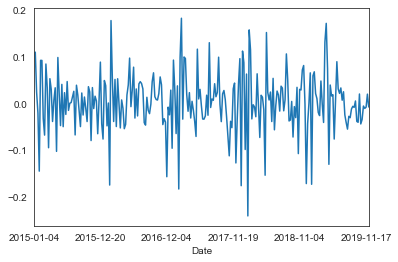

In [0]:
conventional_groupByDate['AveragePrice'].pct_change().plot()

In [0]:
prices = conventional_groupByDate['AveragePrice']

In [0]:
prices.index

DatetimeIndex(['2015-01-04', '2015-01-11', '2015-01-18', '2015-01-25',
               '2015-02-01', '2015-02-08', '2015-02-15', '2015-02-22',
               '2015-03-01', '2015-03-08',
               ...
               '2019-09-29', '2019-10-06', '2019-10-13', '2019-10-20',
               '2019-10-27', '2019-11-03', '2019-11-10', '2019-11-17',
               '2019-11-24', '2019-12-01'],
              dtype='datetime64[ns]', name='Date', length=253, freq=None)

In [0]:
monthly_prices = prices.resample('M').mean()
monthly_prices.head()

Date
2015-01-31    1.113633
2015-02-28    1.079414
2015-03-31    1.106938
2015-04-30    1.131953
2015-05-31    1.116719
Freq: M, Name: AveragePrice, dtype: float64

In [0]:
monthly_prices

Date
2015-01-31    1.113633
2015-02-28    1.079414
2015-03-31    1.106938
2015-04-30    1.131953
2015-05-31    1.116719
2015-06-30    1.110703
2015-07-31    1.130430
2015-08-31    1.139844
2015-09-30    1.091562
2015-10-31    1.077070
2015-11-30    1.045625
2015-12-31    1.030703
2016-01-31    1.002687
2016-02-29    0.949453
2016-03-31    1.020430
2016-04-30    0.966602
2016-05-31    0.951313
2016-06-30    1.098477
2016-07-31    1.193250
2016-08-31    1.192812
2016-09-30    1.192383
2016-10-31    1.336656
2016-11-30    1.390234
2016-12-31    1.091914
2017-01-31    1.066656
2017-02-28    1.032500
2017-03-31    1.320352
2017-04-30    1.327656
2017-05-31    1.298320
2017-06-30    1.298477
2017-07-31    1.329469
2017-08-31    1.463047
2017-09-30    1.637305
2017-10-31    1.575562
2017-11-30    1.284102
2017-12-31    1.182148
2018-01-31    1.175594
2018-02-28    1.089648
2018-03-31    1.149727
2018-04-30    1.121563
2018-05-31    1.060313
2018-06-30    1.121836
2018-07-31    1.121406
2018-0

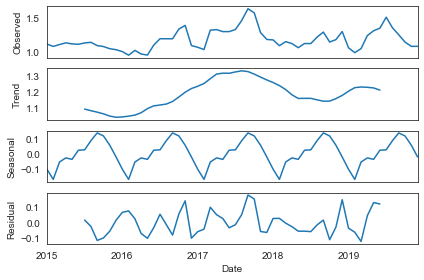

In [0]:

decomposition = seasonal_decompose(monthly_prices)
decomposition.plot()
plt.show()

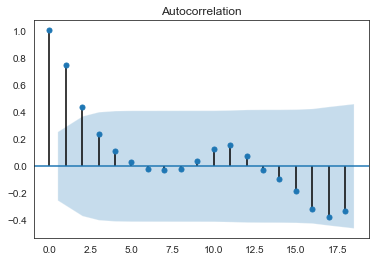

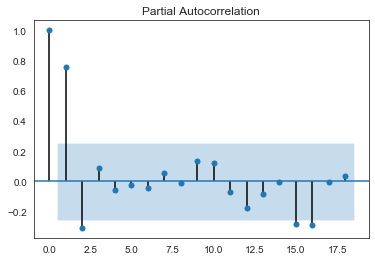

In [0]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(monthly_prices)
plt.show()
plot_pacf(monthly_prices)
plt.show()

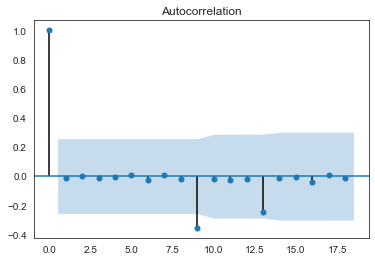

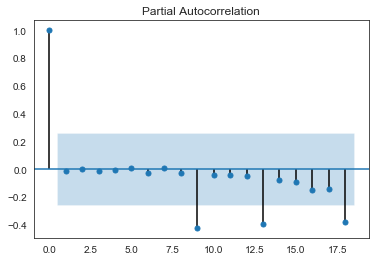

In [0]:
monthly_returns = monthly_prices.pct_change().pct_change().dropna()
plot_acf(monthly_returns)
plt.show()
plot_pacf(monthly_returns)
plt.show()

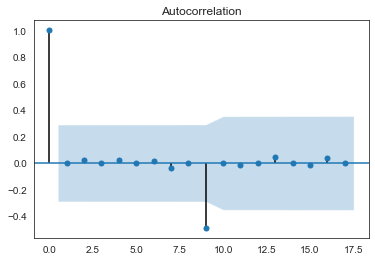

In [0]:
yearly_monthly_returns = monthly_returns.div(monthly_returns.shift(12)) - 1
plot_acf(yearly_monthly_returns.dropna())
plt.show()

In [0]:
train_pct = 0.9
total_len = len(monthly_prices)
monthly_prices_train = monthly_prices.iloc[0:int(train_pct * total_len)]
monthly_prices_test = monthly_prices.iloc[int(train_pct * total_len):total_len]

In [0]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

def best_sarima_model(train_data,p,q,P,Q,d=1,D=1,s=12):
    best_model_aic = np.Inf 
    best_model_bic = np.Inf 
    best_model_hqic = np.Inf
    best_model_order = (0,0,0)
    models = []
    for p_ in p:
        for q_ in q:
            for P_ in P:
                for Q_ in Q:
                    try:
                        no_of_lower_metrics = 0
                        model = SARIMAX(endog=train_data,order=(p_,d,q_), seasonal_order=(P_,D,Q_,s),
                                        enforce_invertibility=False).fit()
                        models.append(model)
                        if model.aic <= best_model_aic: no_of_lower_metrics+=1
                        if model.bic <= best_model_bic: no_of_lower_metrics+=1
                        if model.hqic <= best_model_hqic:no_of_lower_metrics+=1
                        if no_of_lower_metrics >= 2:
                            best_model_aic = np.round(model.aic,0)
                            best_model_bic = np.round(model.bic,0)
                            best_model_hqic = np.round(model.hqic,0)
                            best_model_order = (p_,d,q_,P_,D,Q_,s)
                            current_best_model = model
                            models.append(model)
                            print("Best model so far: SARIMA" +  str(best_model_order) + 
                                  " AIC:{} BIC:{} HQIC:{}".format(best_model_aic,best_model_bic,best_model_hqic)+
                                  " resid:{}".format(np.round(np.exp(current_best_model.resid).mean(),3)))

                    except:
                        pass

    print('\n')
    print(current_best_model.summary())                
    return current_best_model, models

In [0]:
p = range(5)
q = range(5)
P = range(5)
Q = range(5)
d = 2
D = 1
s = 12
best_model_2diff = best_sarima_model(monthly_prices_train, p, q, P, Q, d, D, s)

Best model so far: SARIMA(0, 2, 0, 0, 1, 0, 12) AIC:-16.0 BIC:-14.0 HQIC:-15.0 resid:1.043


/Users/liujing/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Best model so far: SARIMA(0, 2, 0, 1, 1, 0, 12) AIC:-18.0 BIC:-15.0 HQIC:-17.0 resid:1.043


/Users/liujing/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Best model so far: SARIMA(0, 2, 0, 2, 1, 0, 12) AIC:-24.0 BIC:-19.0 HQIC:-22.0 resid:1.043


/Users/liujing/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Best model so far: SARIMA(0, 2, 0, 3, 1, 0, 12) AIC:-26.0 BIC:-19.0 HQIC:-23.0 resid:1.042


/Users/liujing/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Best model so far: SARIMA(0, 2, 1, 0, 1, 0, 12) AIC:-38.0 BIC:-35.0 HQIC:-37.0 resid:1.03


/Users/liujing/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Best model so far: SARIMA(0, 2, 1, 1, 1, 0, 12) AIC:-43.0 BIC:-37.0 HQIC:-41.0 resid:1.028
Best model so far: SARIMA(0, 2, 1, 2, 1, 0, 12) AIC:-47.0 BIC:-39.0 HQIC:-44.0 resid:1.028


/Users/liujing/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Best model so far: SARIMA(0, 2, 1, 3, 1, 0, 12) AIC:-48.0 BIC:-39.0 HQIC:-44.0 resid:1.028


/Users/liujing/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/Users/liujing/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/Users/liujing/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/Users/liujing/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/Users/liujing/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/Users/liujing/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceW

/Users/liujing/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/Users/liujing/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/Users/liujing/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/Users/liujing/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/Users/liujing/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/Users/liujing/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceW

/Users/liujing/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/Users/liujing/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/Users/liujing/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/Users/liujing/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/Users/liujing/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/Users/liujing/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceW



                                 Statespace Model Results                                 
Dep. Variable:                       AveragePrice   No. Observations:                   60
Model:             SARIMAX(0, 2, 1)x(3, 1, 0, 12)   Log Likelihood                  28.905
Date:                            Sun, 03 May 2020   AIC                            -47.809
Time:                                    20:47:18   BIC                            -38.666
Sample:                                01-31-2015   HQIC                           -44.384
                                     - 12-31-2019                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -1.0000   1659.921     -0.001      1.000   -3254.386    3252.386
ar.S.L12      -0.8538      0.221 

In [0]:
monthly_prices_test

Date
2019-07-31    1.511953
2019-08-31    1.355117
2019-09-30    1.251000
2019-10-31    1.143242
2019-11-30    1.080156
2019-12-31    1.080625
Freq: M, Name: AveragePrice, dtype: float64

In [0]:
prediction = best_model_2diff[0].predict(index=monthly_prices.index).iloc[2:]
test_prediction = prediction.iloc[-len(monthly_prices_test):]

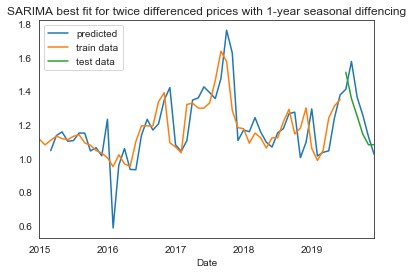

In [0]:
ax = prediction.plot(label='predicted')
monthly_prices_train.plot(ax=ax, label='train data')
monthly_prices_test.plot(ax=ax, label='test data')

plt.legend()
plt.title('SARIMA best fit for twice differenced prices with 1-year seasonal diffencing')
plt.show()

In [0]:


rmse_2diff_train = np.sqrt(best_model_2diff[0].resid[2:].pow(2).mean())
rmse_2diff_test = np.sqrt(test_prediction.sub(monthly_prices_test).pow(2).mean())
print(f'train rmse {rmse_2diff_train}')
print(f'test rmse {rmse_2diff_test}')

train rmse 0.1271451849848305
test rmse 0.1226673827931373


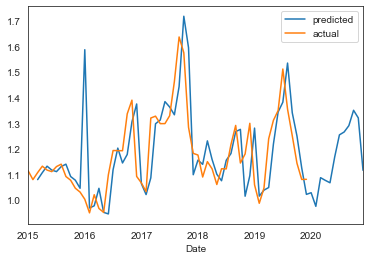

In [0]:
ax = best_model_1diff[0].predict(start='2015-03-31', end='2020-12-31').plot(label='predicted')
monthly_prices.plot(ax=ax, label='actual')
plt.legend()
plt.show()

In [0]:
rmse_1diff = np.sqrt(best_model_1diff[0].resid[2:].pow(2).mean())
rmse_1diff

In [0]:
rmse_2diff = np.sqrt(best_model[0].resid[2:].pow(2).mean())
rmse_2diff

0.1271451849848305

#### [Reference3] fbprophet

In [0]:
import pandas as pd
import fbprophet 

In [0]:
conventional_AveragePrice.head()

AveragePrice
Date                    
2015-01-04     -0.631801
2015-01-11     -0.026149
2015-01-18      0.122311
2015-01-25     -0.006748
2015-02-01     -0.896668

In [0]:
df_proph = pd.DataFrame() 
df_proph.ds= conventional_AveragePrice.index
df_proph.y= conventional_AveragePrice.AveragePrice
df_proph.head()

Empty DataFrame
Columns: []
Index: []

In [0]:

df_proph = pd.DataFrame() 
df_proph.ds= conventional_AveragePrice.index
df_proph.y= conventional_AveragePrice.AveragePrice


proph = fbprophet.Prophet()
proph.fit(df_proph)

ValueError: ignored

In [0]:
future = proph.make_future_dataframe(periods=10)
future

ds
0     2015-01-04
1     2015-01-04
2     2015-01-04
3     2015-01-04
4     2015-01-04
...          ...
16197 2019-12-07
16198 2019-12-08
16199 2019-12-09
16200 2019-12-10
16201 2019-12-11

[16202 rows x 1 columns]

In [0]:
forecast = proph.predict(future)

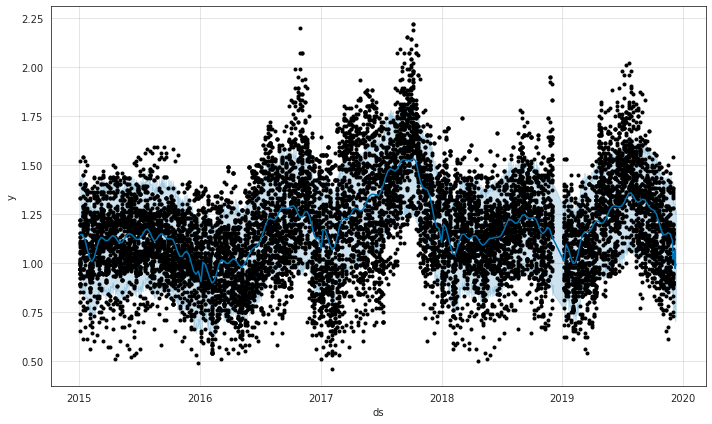

In [0]:
import matplotlib.pyplot as plt
proph.plot(forecast)
plt.show()

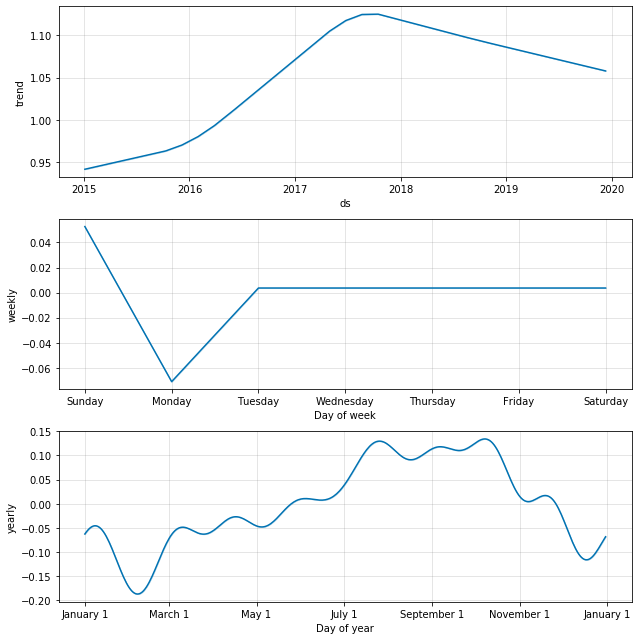

In [0]:
proph.plot_components(forecast)
plt.show()

NameError: name 'df_TotalUS' is not defined

In [0]:
#Force the date to be a pandas datetime columns, so that we can also have monthly, yearly data more easily.
df_TotalUS['Date'] = pd.to_datetime(df_TotalUS['Date'])
df_TotalUS['Month'] = df_TotalUS['Date'].dt.month
df_TotalUS.head()


In [0]:
#Delete the data for organic avocado
df_TotalUSOrganic = df_TotalUSOrganic[df_TotalUSOrganic['AveragePrice']>1.16]

In [0]:
#Plot the time series of organic and conventional avocado

import plotly.graph_objects as go
import plotly.express as px

fig = go.Figure()

# Add traces
fig.add_trace(go.Scatter(x=df_TotalUSConventional['Date'], y=df_TotalUSConventional['AveragePrice'],
                    mode='lines+markers',
                    name='AveragePriceForConventionalAvocado'))
fig.add_trace(go.Scatter(x=df_TotalUSOrganic['Date'], y=df_TotalUSOrganic['AveragePrice'],
                    mode='lines+markers',
                    name='AveragePriceForOrganicAvocado'))

#fig.add_trace(go.Scatter(x=random_x, y=random_y2,
#                    mode='lines',
#                    name='lines'))

fig.update_layout(height=300, margin={"r":0,"t":0,"l":0,"b":0}, title = '', xaxis ={'title':'Date'}, yaxis = {'title':'Price'})

fig.show()

In [0]:
#Plot the time series of organic and conventional avocado

import plotly.graph_objects as go
import plotly.express as px

fig = go.Figure()

# Add traces
fig.add_trace(go.Scatter(x=df_TotalUSConventional['Date'], y=df_TotalUSConventional['Total Volume'],
                    mode='lines+markers',
                    name='TotalVolumeForConventionalAvocado'))
fig.add_trace(go.Scatter(x=df_TotalUSOrganic['Date'], y=df_TotalUSOrganic['Total Volume'],
                    mode='lines+markers',
                    name='TotalVolumeForOrganicAvocado'))

#fig.add_trace(go.Scatter(x=random_x, y=random_y2,
#                    mode='lines',
#                    name='lines'))

fig.update_layout(height=300, margin={"r":0,"t":0,"l":0,"b":0}, title = '', xaxis ={'title':'Date'}, yaxis = {'title':'Total Volume'})

fig.show()

It appears that the overall price of the avocado in the usa suffered in "the great avocadopocalypse of 2017, but some of this could also be caused by the seasonal variability.

In [0]:
#Let's use the AveragePrice as the univariate data
a = list(df_TotalUSConventional['AveragePrice'])
a
#len(a)

[0.95,
 1.01,
 1.03,
 1.04,
 0.89,
 0.95,
 1.03,
 1.02,
 0.97,
 1.02,
 1.04,
 1.01,
 1.04,
 1.06,
 1.02,
 1.03,
 1.07,
 0.96,
 1.02,
 1.06,
 1.04,
 1.03,
 1.0,
 0.98,
 1.02,
 1.06,
 1.04,
 1.07,
 1.07,
 1.07,
 1.09,
 1.05,
 1.05,
 1.08,
 1.07,
 1.02,
 1.03,
 1.02,
 1.03,
 1.02,
 1.0,
 0.99,
 1.04,
 0.97,
 0.97,
 0.92,
 0.96,
 0.99,
 0.89,
 0.93,
 0.98,
 0.95,
 0.86,
 0.93,
 0.94,
 0.95,
 0.93,
 0.76,
 0.88,
 0.94,
 0.91,
 0.95,
 0.93,
 0.93,
 0.94,
 0.94,
 0.9,
 0.9,
 0.87,
 0.84,
 0.82,
 0.89,
 0.93,
 0.94,
 0.97,
 1.04,
 1.02,
 1.04,
 1.06,
 1.1,
 1.15,
 1.2,
 1.23,
 1.15,
 1.12,
 1.1,
 1.09,
 1.04,
 1.08,
 1.15,
 1.22,
 1.23,
 1.27,
 1.3,
 1.34,
 1.43,
 1.44,
 1.36,
 1.27,
 1.21,
 1.0,
 0.98,
 0.96,
 1.0,
 0.89,
 0.99,
 0.98,
 0.94,
 0.96,
 0.77,
 0.87,
 0.99,
 0.99,
 1.13,
 1.22,
 1.25,
 1.24,
 1.21,
 1.21,
 1.23,
 1.18,
 1.18,
 1.09,
 1.19,
 1.26,
 1.28,
 1.24,
 1.21,
 1.18,
 1.17,
 1.21,
 1.17,
 1.33,
 1.31,
 1.32,
 1.33,
 1.33,
 1.41,
 1.47,
 1.57,
 1.56,
 1.41,
 1.64,
 1.69,
 1

In [0]:
from numpy import array
#Split a univariate sequence into samples
def slipt_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
        #find the end of this pattern
        end_ix = i + n_steps
        #check if we are beyong the sequence
        if end_ix > len(sequence)-1:
            break
        #gather input and output parts of the pattern
        seq_x, seq_y = sequence[i: end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)

#Define input sequence
raw_seq = a
#Choose a number of time steps
n_steps = 3
#Split into samples
X, y = slipt_sequence(raw_seq, n_steps)
#summarize the data
for i in range(len(X)):
    print(X[i],y[i])

[0.95 1.01 1.03] 1.04
[1.01 1.03 1.04] 0.89
[1.03 1.04 0.89] 0.95
[1.04 0.89 0.95] 1.03
[0.89 0.95 1.03] 1.02
[0.95 1.03 1.02] 0.97
[1.03 1.02 0.97] 1.02
[1.02 0.97 1.02] 1.04
[0.97 1.02 1.04] 1.01
[1.02 1.04 1.01] 1.04
[1.04 1.01 1.04] 1.06
[1.01 1.04 1.06] 1.02
[1.04 1.06 1.02] 1.03
[1.06 1.02 1.03] 1.07
[1.02 1.03 1.07] 0.96
[1.03 1.07 0.96] 1.02
[1.07 0.96 1.02] 1.06
[0.96 1.02 1.06] 1.04
[1.02 1.06 1.04] 1.03
[1.06 1.04 1.03] 1.0
[1.04 1.03 1.  ] 0.98
[1.03 1.   0.98] 1.02
[1.   0.98 1.02] 1.06
[0.98 1.02 1.06] 1.04
[1.02 1.06 1.04] 1.07
[1.06 1.04 1.07] 1.07
[1.04 1.07 1.07] 1.07
[1.07 1.07 1.07] 1.09
[1.07 1.07 1.09] 1.05
[1.07 1.09 1.05] 1.05
[1.09 1.05 1.05] 1.08
[1.05 1.05 1.08] 1.07
[1.05 1.08 1.07] 1.02
[1.08 1.07 1.02] 1.03
[1.07 1.02 1.03] 1.02
[1.02 1.03 1.02] 1.03
[1.03 1.02 1.03] 1.02
[1.02 1.03 1.02] 1.0
[1.03 1.02 1.  ] 0.99
[1.02 1.   0.99] 1.04
[1.   0.99 1.04] 0.97
[0.99 1.04 0.97] 0.97
[1.04 0.97 0.97] 0.92
[0.97 0.97 0.92] 0.96
[0.97 0.92 0.96] 0.99
[0.92 0.96 0

In [0]:
X.shape

(250, 3)

In [0]:
X

array([[0.95, 1.01, 1.03],
       [1.01, 1.03, 1.04],
       [1.03, 1.04, 0.89],
       [1.04, 0.89, 0.95],
       [0.89, 0.95, 1.03],
       [0.95, 1.03, 1.02],
       [1.03, 1.02, 0.97],
       [1.02, 0.97, 1.02],
       [0.97, 1.02, 1.04],
       [1.02, 1.04, 1.01],
       [1.04, 1.01, 1.04],
       [1.01, 1.04, 1.06],
       [1.04, 1.06, 1.02],
       [1.06, 1.02, 1.03],
       [1.02, 1.03, 1.07],
       [1.03, 1.07, 0.96],
       [1.07, 0.96, 1.02],
       [0.96, 1.02, 1.06],
       [1.02, 1.06, 1.04],
       [1.06, 1.04, 1.03],
       [1.04, 1.03, 1.  ],
       [1.03, 1.  , 0.98],
       [1.  , 0.98, 1.02],
       [0.98, 1.02, 1.06],
       [1.02, 1.06, 1.04],
       [1.06, 1.04, 1.07],
       [1.04, 1.07, 1.07],
       [1.07, 1.07, 1.07],
       [1.07, 1.07, 1.09],
       [1.07, 1.09, 1.05],
       [1.09, 1.05, 1.05],
       [1.05, 1.05, 1.08],
       [1.05, 1.08, 1.07],
       [1.08, 1.07, 1.02],
       [1.07, 1.02, 1.03],
       [1.02, 1.03, 1.02],
       [1.03, 1.02, 1.03],
 

In [0]:
X.shape[0]

250

In [0]:
#reshape from [samples, timeteps] into [samples, timesteps, featuers]
n_features = 1
X = X.reshape(X.shape[0] ,X.shape[1],n_features)

In [0]:
#Define model
model = Sequential()
model.add(LSTM(50,activation='relu',input_shape=(n_steps, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mse')


Instructions for updating:
If using Keras pass *_constraint arguments to layers.


We define a model with 50 LSTM units in the hidden layer and an output layer that predicts a single numerical value. The model is fit using the efficient Adam version of stochastic gradient decent and optimized using the mean squared error or 'mse' loss function.

In [0]:
#Once the model is defined, we can fit it on the training dataset.
#fit model
model.fit(X,y,epochs = 200, verbose =0)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [0]:
n_steps

3

In [0]:
x_input=array([0.8,1.2,1.1])
x_input = x_input.reshape(1,n_steps,n_features)
yhat = model.predict(x_input,verbose=0)

In [0]:
yhat

array([[1.0760567]], dtype=float32)

In [0]:
def predict_last(x_input):
    x_reshaped = x_input.reshape(1, n_steps, n_features)
    yhat = model.predict(x_reshaped, verbose=0)
    return yhat[0][0]
samples = X.reshape(X.shape[0], X.shape[1])
predicted = [predict_last(x) for x in samples]

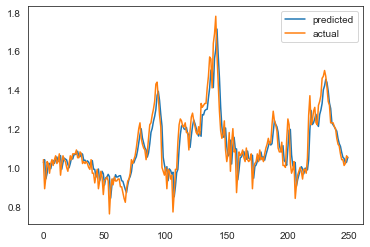

In [0]:
import matplotlib.pyplot as plt 
plt.plot(predicted, label='predicted')
plt.plot(y, label='actual')
plt.legend()
plt.show()

In [0]:
from keras.preprocessing import sequence
from keras.models import load_model

Using TensorFlow backend.


##### Stateful vs. Stateless LSTM
    1.Stateless: LSTM updates parameters on batch 1 and then initiates cell states (meaning - memory, usually with zeros) for batch 2
    2. Stateful: it uses batch 1 last output cell sates as initial states for batch 2.

##### When to use which?
    - When sequences in batches are related to each other (e.g. prices of one commodity), we should better use stateful mode
    - Else, when one sequence represents a complete sentence, we should go with stateless mode
    
##### Here we use the stateful LSTM.

###### Batch-size: which batch-size to choose? Important!
    With stateful LSTMs the trainings-set size must be divisible without remainder by the batch-size (modulo = 0)

In [0]:
# defining the batch size and number of epochs
batch_size = 6
epochs = 120
timesteps = 4

In [0]:
length = len(df_TotalUSConventional['AveragePrice'])
print(length)
length *= 1 - 0.1
print(length)

253
227.70000000000002


In [0]:
df_TotalUSConventional_AveragePrice = df_TotalUSConventional['AveragePrice']

In [0]:
def get_train_length(dataset, batch_size, test_percent):
    # substract test_percent to be excluded from training, reserved for testset
    length = len(dataset)
    length *= 1 - test_percent
    train_length_values = []
    for x in range(int(length) - 100,int(length)): 
        modulo=x%batch_size
        if (modulo == 0):
            train_length_values.append(x)
            print(x)
    return (max(train_length_values))

In [0]:
length = get_train_length(df_TotalUSConventional_AveragePrice, batch_size, 0.1)
print(length)


132
138
144
150
156
162
168
174
180
186
192
198
204
210
216
222
222


In [0]:
##!!!!!!!!!But we have some different time steps.
df_TotalUSConventional_AveragePrice

[13104    0.95
 13105    1.01
 13106    1.03
 13107    1.04
 13108    0.89
          ... 
 13099    1.04
 13100    1.01
 13101    1.02
 13102    1.06
 13103    1.05
 Name: AveragePrice, Length: 253, dtype: float64]

In [0]:
#Adding timesteps * 2
upper_train = length + timesteps*2
df_TotalUSConventional_AveragePrice_train = df_TotalUSConventional_AveragePrice[0:upper_train]
training_set = df_TotalUSConventional_AveragePrice_train.iloc[:,1:2].values
training_set.shape

IndexingError: Too many indexers

In [0]:
# Feature Scaling
#scale between 0 and 1. the weights are easier to find.
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(np.float64(training_set))
training_set_scaled.shape

(230, 1)

In [0]:
X_train = []
y_train = []


# Creating a data structure with n timesteps

print(length + timesteps)
for i in range(timesteps, length + timesteps): 
    X_train.append(training_set_scaled[i-timesteps:i,0])
    y_train.append(training_set_scaled[i:i+timesteps,0])

print(len(X_train))
print(len(y_train))
#create X_train matrix
#30 items per array (timestep) 
print(X_train[0:2])
print(np.array(X_train).shape)
#create Y_train matrix
#30 items per array (timestep) 
print(y_train[0:2])
print(np.array(y_train).shape)

226
222
222
[array([0.18627451, 0.24509804, 0.26470588, 0.2745098 ]), array([0.24509804, 0.26470588, 0.2745098 , 0.12745098])]
(222, 4)
[array([0.12745098, 0.18627451, 0.26470588, 0.25490196]), array([0.18627451, 0.26470588, 0.25490196, 0.20588235])]
(222, 4)


In [0]:
# Reshaping
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
y_train = np.reshape(y_train, (y_train.shape[0], y_train.shape[1], 1))
print(X_train.shape)
print(y_train.shape)

(222, 4, 1)
(222, 4, 1)


In [0]:
# Building the LSTM
# Importing the Keras libraries and packages

from keras.layers import Dense
from keras.layers import Input, LSTM
from keras.models import Model
import h5py

In [0]:
# Initialising the LSTM Model with MAE Loss-Function
# Using Functional API

inputs_1_mae = Input(batch_shape=(batch_size,timesteps,1))
#each layer is the input of the next layer
lstm_1_mae = LSTM(10, stateful=True, return_sequences=True)(inputs_1_mae)
lstm_2_mae = LSTM(10, stateful=True, return_sequences=True)(lstm_1_mae)

output_1_mae = Dense(units = 1)(lstm_2_mae)

regressor_mae = Model(inputs=inputs_1_mae, outputs = output_1_mae)

#adam is fast starting off and then gets slower and more precise
#mae -> mean absolute error loss function
regressor_mae.compile(optimizer='adam', loss = 'mae')
regressor_mae.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (6, 4, 1)                 0         
_________________________________________________________________
lstm_1 (LSTM)                (6, 4, 10)                480       
_________________________________________________________________
lstm_2 (LSTM)                (6, 4, 10)                840       
_________________________________________________________________
dense_1 (Dense)              (6, 4, 1)                 11        
Total params: 1,331
Trainable params: 1,331
Non-trainable params: 0
_________________________________________________________________


In [0]:
###Try with .........

In [0]:
#try it in a different environment
#!conda install -c conda-forge gcc -y
#!pip install fbprophet

In [0]:
df_TotalUSConventional_train

Date  AveragePrice  Total Volume         4046         4225  \
13104 2015-01-04          0.95   31324277.73  12357161.34  13624083.05   
13105 2015-01-11          1.01   29063542.75  11544810.53  12134773.38   
13106 2015-01-18          1.03   29043458.85  11858139.34  11701947.80   
13107 2015-01-25          1.04   28470310.84  12167445.03  10734652.82   
13108 2015-02-01          0.89   44655461.51  18933038.04  18956479.74   
...          ...           ...           ...          ...          ...   
13076 2019-05-26          1.31   40514870.62  11623029.55  10706872.74   
13077 2019-06-02          1.23   43111485.93  11420785.75  11004956.59   
13078 2019-06-09          1.22   43111833.62  11656650.13  11308618.81   
13079 2019-06-16          1.32   39221437.21  10842298.19  10280896.51   
13080 2019-06-23          1.34   38628187.43  10625892.82   9968046.33   

             4770   Total Bags   Small Bags  Large Bags  XLarge Bags  \
13104   844093.32   4498940.02   3585321.58   894945.63     18672.81   
13105   866574.66   4517384.18   3783261.16   718333.87     15789.15   
13106   831301.90   4652069.81   3873041.26   771093.20      7935.35   
13107   768020.05   4800192.94   3978636.90   812924.73      8631.31   
13108  1381516.11   5384427.62   4216452.03  1121076.47     46899.12   
...           ...          ...          ...         ...          ...   
13076   824382.07  17360586.26  10942409.29  6110523.23    307653.74   
13077  1002653.78  19683089.81  11094953.78  7743206.20    844929.83   
13078   825153.40  19321411.28  10846855.02  7806415.69    668140.57   
13079   816707.63  17281534.88  10407244.32  6314650.15    559640.41   
13080   764157.27  17270091.01   9808034.03  6785757.85    676299.13   

               type  year   Region  Month  
13104  conventional  2015  TotalUS      1  
13105  conventional  2015  TotalUS      1  
13106  conventional  2015  TotalUS      1  
13107  conventional  2015  TotalUS      1  
13108  conventional  2015  TotalUS      2  
...             ...   ...      ...    ...  
13076  conventional  2019  TotalUS      5  
13077  conventional  2019  TotalUS      6  
13078  conventional  2019  TotalUS      6  
13079  conventional  2019  TotalUS      6  
13080  conventional  2019  TotalUS      6  

[230 rows x 14 columns]

In [0]:
! pip install pystan==2.18

     |████████████████████████████████| 52.1MB 665kB/s eta 0:00:01    |███▊                            | 6.0MB 611kB/s eta 0:01:16     |████████████████████████████▋   | 46.5MB 443kB/s eta 0:00:13     |█████████████████████████████▏  | 47.4MB 428kB/s eta 0:00:11
  Found existing installation: pystan 2.19.1.1
    Uninstalling pystan-2.19.1.1:
      Successfully uninstalled pystan-2.19.1.1


In [0]:
import pystan
model_code = 'parameters {real y;} model {y ~ normal(0,1);}'
model = pystan.StanModel(model_code=model_code)  # this will take a minute
y = model.sampling(n_jobs=1).extract()['y']
y.mean()  # should be close to 0

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_5944b02c79788fa0db5b3a93728ca2bf NOW.


CompileError: command 'gcc' failed with exit status 1